In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Exited.value_counts() # Imbalance which we will treat in the end

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
churn_yes_t = df[df.Exited == 1].Tenure

In [ ]:
churn_no_t = df[df.Exited == 0].Tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


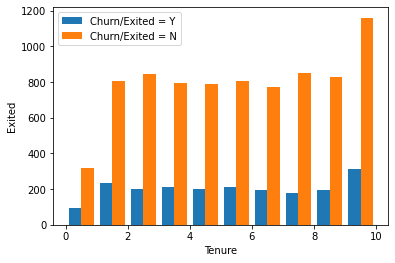

In [ ]:
plt.hist([churn_yes_t,churn_no_t],label=['Churn/Exited = Y','Churn/Exited = N'])
plt.xlabel("Tenure")
plt.ylabel('Exited')
plt.legend()

In [ ]:
# well as  far as we can see majority of the customers are retained as the tenure increases while except the initial and final point the customer exit is almost constant.

In [ ]:
#Lets check this with salary and bank balance too.

In [ ]:
churn_no_s = df[df.Exited == 0].EstimatedSalary

In [ ]:
churn_yes_s = df[df.Exited == 1].EstimatedSalary

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


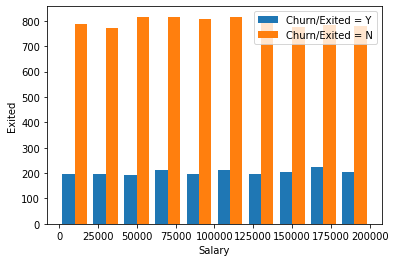

In [ ]:
plt.hist([churn_yes_s,churn_no_s],label=['Churn/Exited = Y','Churn/Exited = N'])
plt.xlabel('Salary')
plt.ylabel('Exited')
plt.legend()

In [ ]:
# people in the lower salary bracket have high churn rate implying that maybe bank policie didn't suit them much.

In [ ]:
churn_no_b = df[df.Exited == 0].Balance

In [ ]:
churn_yes_b = df[df.Exited == 1].Balance

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


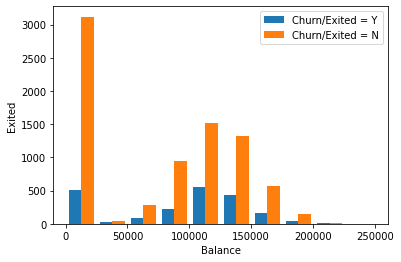

In [ ]:
plt.hist([churn_yes_b,churn_no_b],label=['Churn/Exited = Y','Churn/Exited = N'])
plt.xlabel('Balance')
plt.ylabel('Exited')
plt.legend()

In [ ]:
# the only thing i am able to comprehend from this chart is that at around 20k balance most people have not exited basically means that this must be AMB requirement of the bank and majority people are there to enjoy just the regular benefits bank provide and nothing more

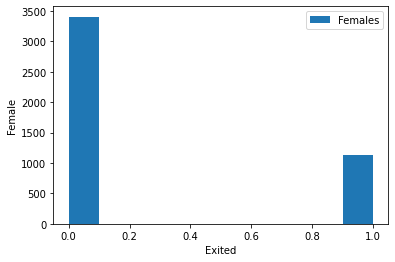

In [ ]:
churn_no_f = df[df.Gender == 'Female'].Exited
plt.hist(churn_no_f,label='Females')
plt.xlabel('Exited')
plt.ylabel('Female')
plt.legend()

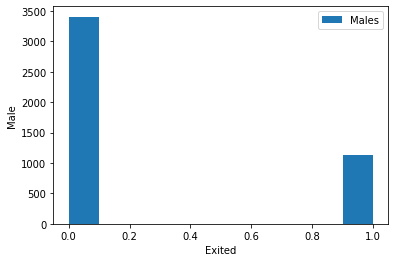

In [ ]:
churn_no_m = df[df.Gender == 'Male'].Exited
plt.hist(churn_no_f,label='Males')
plt.xlabel('Exited')
plt.ylabel('Male')
plt.legend()

In [ ]:
len(df[df.Gender == 'Male'])

5457

In [ ]:
# 54 M and 46 F thats why so similar distribution. Alas this chart didn't gave any helpful info lets go ahead.

In [ ]:
import seaborn as sns

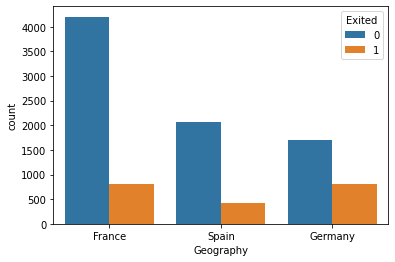

In [ ]:
sns.countplot(x='Geography' , hue='Exited' , data = df)

In [ ]:
# France has the most retention and relatively the least churn too

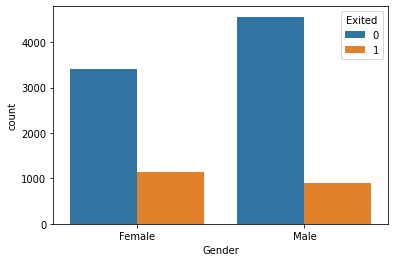

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=df)

In [ ]:
# Females have more churn

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Gender.replace({'Male':1 , 'Female':0},inplace=True)

In [ ]:
df1 = pd.get_dummies(data = df, columns=['Geography'])

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm = MinMaxScaler()

In [ ]:
df1[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']] = norm.fit_transform(df1[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']])

In [ ]:
X = df1.drop('Exited',axis = 1)

In [ ]:
y = df1.Exited

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
model = keras.Sequential()

In [ ]:
X_train.shape

(7500, 12)

In [ ]:
model.add( Dense(64,activation='relu',input_shape=(12,)))

In [ ]:
model.add(Dense(32,activation='relu'))

In [ ]:
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
235/235 [==============================] - 0s 820us/step - loss: 0.3131 - accuracy: 0.8677
Epoch 2/50
235/235 [==============================] - 0s 946us/step - loss: 0.3129 - accuracy: 0.8699
Epoch 3/50
235/235 [==============================] - 0s 858us/step - loss: 0.3114 - accuracy: 0.8695
Epoch 4/50
235/235 [==============================] - 0s 918us/step - loss: 0.3114 - accuracy: 0.8685
Epoch 5/50
235/235 [==============================] - 0s 977us/step - loss: 0.3103 - accuracy: 0.8713
Epoch 6/50
235/235 [==============================] - 0s 945us/step - loss: 0.3119 - accuracy: 0.8696
Epoch 7/50
235/235 [==============================] - 0s 971us/step - loss: 0.3117 - accuracy: 0.8689
Epoch 8/50
235/235 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8711
Epoch 9/50
235/235 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8720
Epoch 10/50
235/235 [==============================] - 0s 900us/step - loss: 0.3075 - 

In [ ]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 591us/step - loss: 0.3800 - accuracy: 0.8468


[0.38000741600990295, 0.8468000292778015]

In [ ]:
## Treating Imbalance

In [ ]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df_0 = df1[df1.Exited == 0]

In [ ]:
df_1 = df1[df1.Exited == 1]

In [ ]:
len(df_0),len(df_1)

(7963, 2037)

In [ ]:
#Last time over sampling was the best and this is sort of similar dataset so trying first with that

In [ ]:
df_1_n = df_1.sample(len(df_0),replace=True)

In [ ]:
df2 = pd.concat([df_0,df_1_n],axis=0)

In [ ]:
df2.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
X = df2.drop('Exited',axis=1)

In [ ]:
y = df2.Exited

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add( Dense(64,activation='relu',input_shape=(12,)))

In [ ]:
model.add( Dense(32,activation= 'relu'))

In [ ]:
model.add( Dense(1 , activation='relu'))

In [ ]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
374/374 [==============================] - 1s 2ms/step - loss: 0.6725 - accuracy: 0.6075
Epoch 2/50
374/374 [==============================] - 1s 2ms/step - loss: 0.5781 - accuracy: 0.7050
Epoch 3/50
374/374 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7303
Epoch 4/50
374/374 [==============================] - 1s 2ms/step - loss: 0.5208 - accuracy: 0.7447
Epoch 5/50
374/374 [==============================] - 1s 2ms/step - loss: 0.5266 - accuracy: 0.7495
Epoch 6/50
374/374 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.7641
Epoch 7/50
374/374 [==============================] - 1s 2ms/step - loss: 0.5097 - accuracy: 0.7528
Epoch 8/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.7573
Epoch 9/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4989 - accuracy: 0.7667
Epoch 10/50
374/374 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.7607

In [ ]:
model.evaluate(X_test,y_test)

125/125 [==============================] - 0s 983us/step - loss: 0.4638 - accuracy: 0.7850


[0.46375522017478943, 0.7850326299667358]

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
X_s,y_s = sm.fit_sample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s)

In [ ]:
model.add( Dense(64,activation='relu',input_shape=(12,)))

In [ ]:
model.add(Dense(32,activation='relu'))

In [ ]:
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=75)

Epoch 1/75
374/374 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.7079
Epoch 2/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.7862
Epoch 3/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7979
Epoch 4/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.7959
Epoch 5/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.7974
Epoch 6/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.8065
Epoch 7/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8065
Epoch 8/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8074
Epoch 9/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.8070
Epoch 10/75
374/374 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8063

In [ ]:
model.evaluate(X_test,y_test)

125/125 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8270


[0.38046517968177795, 0.8269713521003723]

In [ ]:
#here smote works better opposite of our previous case